# BIKE SHARING ASSIGNMENT

`Company Name`: Boombikes

`Problem Statement`:Build a model on the demand for shared bikes with the available independent variables.This will be used by the management to understand how exactly the demands vary with different features so that they can accordingly manipulate the business strategy to meet the demand levels and meet the customer's expectations. Further, the model is a good way for management to understand the demand dynamics of a new market. 

In [1]:
#importing improtant libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

import statsmodels.api as sm

- [Reading The Data](#Read)
- [Exploratory Data Analysis](#EDA)
- [Data Preprocessing](#DPP)
    - [Creating Dummy Variables](#Dummy)
    - [Dropping Columns](#Drop)
- [Linear Regression Modelling](#Linear)
    - [Train Test Split](#Split)
    - [MinMax Scaling](#MinMax)
    - [Linear Model-I](#LM1)
    - [Linear Model-II](#LM2)
    - [Linear Model-III](#LM3)
    - [Linear Model-IV](#LM4)
    - [Linear Model-V](#LM5)
    - [Linear Model-VI](#LM6)
    - [Linear Model-VII](#LM7)
    - [Residual Analysis](#Residual)
    - [Prediction of Test Data](#Predict)
    - [Model Evaluation](#Eval)

<a id="Read"></a>
## Reading the Data

In [2]:
#reading the dataframe and viewing it.
bikes=pd.read_csv("day.csv")
bikes.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,1,1,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,2,1,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,3,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,4,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,5,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [3]:
#Getting the shape of the dataframe
bikes.shape

(730, 16)

In [4]:
#info the dataset, null values in the dataset
bikes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     730 non-null    int64  
 1   dteday      730 non-null    object 
 2   season      730 non-null    int64  
 3   yr          730 non-null    int64  
 4   mnth        730 non-null    int64  
 5   holiday     730 non-null    int64  
 6   weekday     730 non-null    int64  
 7   workingday  730 non-null    int64  
 8   weathersit  730 non-null    int64  
 9   temp        730 non-null    float64
 10  atemp       730 non-null    float64
 11  hum         730 non-null    float64
 12  windspeed   730 non-null    float64
 13  casual      730 non-null    int64  
 14  registered  730 non-null    int64  
 15  cnt         730 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.4+ KB


In [5]:
#Converting Date in datetime data
bikes['dteday']=pd.to_datetime(bikes['dteday'])

In [6]:
bikes.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2018-01-01,1,0,1,0,1,1,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,2018-02-01,1,0,1,0,2,1,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,2018-03-01,1,0,1,0,3,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,2018-04-01,1,0,1,0,4,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,2018-05-01,1,0,1,0,5,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


<a id="EDA"></a>
## Exploratory Data Analysis

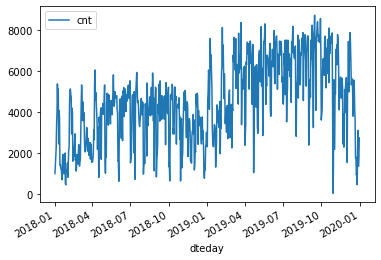

In [7]:
#Plotting Cnt(demand) over the date.
bikes.plot('dteday','cnt')
plt.show()

Infernce: 
- Demand changes very frequently for a long period of time
- Over the year the demand is seemed to be increasing in general

In [8]:
bikes.groupby("season")['cnt'].sum()

season
1     469514
2     918589
3    1061129
4     841613
Name: cnt, dtype: int64

1- Spring; 2- Summer; 3- Fall;  4- Winter

Inference: We can see that the spring season has had the least demand for sharing bikes, whereas fall had the most.

In [9]:
bikes.groupby('yr')['cnt'].sum()

yr
0    1243103
1    2047742
Name: cnt, dtype: int64

Inference: We can definetly confirm that the demand has increased substantiall in 2019 compared to 2018.

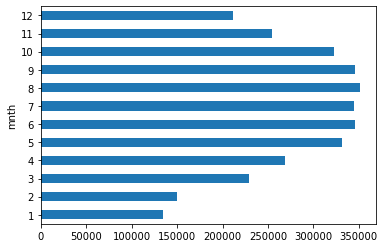

In [10]:
bikes.groupby('mnth')['cnt'].sum().plot.barh()
plt.show()

Inference: We can see that the demand s highest during the month of august,september 

In [11]:
bikes.groupby('workingday')['cnt'].sum()

workingday
0    1036857
1    2253988
Name: cnt, dtype: int64

Inference: We can see that the demand is more on working day than on weekend/honliday

In [12]:
bikes.groupby('weathersit')['cnt'].sum()

weathersit
1    2257952
2     995024
3      37869
Name: cnt, dtype: int64

1-Clear; 2-Cloudy ; 3-Light Snowfall; 4- Heavy Snowfall 

Inference: As the weather situation gets worsen, the demand decreases. We can also note that there's no record in our table which has heavy snowfall

<a id="DPP"></a>
## Data Preprocessing

<a id="Dummy"></a>
### Creating Dummy Variables

**Converting variable "season","weathersit","weekday","mnth" into dummy variables**

In [13]:
#Creating dummies for season variable and dropping redundant column
season=pd.get_dummies(bikes['season'],drop_first=True)
bikes=pd.concat([bikes,season],axis=1)
bikes=bikes.drop(['season'],axis=1)
bikes=bikes.rename(columns={2:"summer", 3:"fall", 4:"winter"})
bikes.head()

,instant,dteday,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt,summer,fall,winter
0,1,2018-01-01,0,1,0,1,1,2,14.110847,18.18125,80.5833,10.749882,331,654,985,0,0,0
1,2,2018-02-01,0,1,0,2,1,2,14.902598,17.68695,69.6087,16.652113,131,670,801,0,0,0
2,3,2018-03-01,0,1,0,3,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349,0,0,0
3,4,2018-04-01,0,1,0,4,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562,0,0,0
4,5,2018-05-01,0,1,0,5,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600,0,0,0


In [14]:
#Creating dummy variable for weathersit
weather=pd.get_dummies(bikes['weathersit'],drop_first=True)
bikes=pd.concat([bikes,weather],axis=1)
bikes=bikes.drop(['weathersit'],axis=1)
bikes=bikes.rename(columns={2:"Cloudy", 3:"Light Snowfall", 4:"Heavy Snowfall"})
bikes.head()

,instant,dteday,yr,mnth,holiday,weekday,workingday,temp,atemp,hum,windspeed,casual,registered,cnt,summer,fall,winter,Cloudy,Light Snowfall
0,1,2018-01-01,0,1,0,1,1,14.110847,18.18125,80.5833,10.749882,331,654,985,0,0,0,1,0
1,2,2018-02-01,0,1,0,2,1,14.902598,17.68695,69.6087,16.652113,131,670,801,0,0,0,1,0
2,3,2018-03-01,0,1,0,3,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349,0,0,0,0,0
3,4,2018-04-01,0,1,0,4,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562,0,0,0,0,0
4,5,2018-05-01,0,1,0,5,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600,0,0,0,0,0


In [15]:
#Creating dummy variable for weekday
week=pd.get_dummies(bikes['weekday'],drop_first=True)
bikes=pd.concat([bikes,week],axis=1)
bikes=bikes.drop(['weekday'],axis=1)
bikes=bikes.rename(columns={1:"Monday",2:"Tuesday",3:"Wednesday",4:"Thursday",5:"Friday",6:"Saturday"})
bikes.head(8)

,instant,dteday,yr,mnth,holiday,workingday,temp,atemp,hum,windspeed,...,fall,winter,Cloudy,Light Snowfall,Monday,Tuesday,Wednesday,Thursday,Friday,Saturday
0,1,2018-01-01,0,1,0,1,14.110847,18.18125,80.5833,10.749882,...,0,0,1,0,1,0,0,0,0,0
1,2,2018-02-01,0,1,0,1,14.902598,17.68695,69.6087,16.652113,...,0,0,1,0,0,1,0,0,0,0
2,3,2018-03-01,0,1,0,1,8.050924,9.47025,43.7273,16.636703,...,0,0,0,0,0,0,1,0,0,0
3,4,2018-04-01,0,1,0,1,8.200000,10.60610,59.0435,10.739832,...,0,0,0,0,0,0,0,1,0,0
4,5,2018-05-01,0,1,0,1,9.305237,11.46350,43.6957,12.522300,...,0,0,0,0,0,0,0,0,1,0
5,6,2018-06-01,0,1,0,0,8.378268,11.66045,51.8261,6.000868,...,0,0,0,0,0,0,0,0,0,1
6,7,2018-07-01,0,1,0,0,8.057402,10.44195,49.8696,11.304642,...,0,0,1,0,0,0,0,0,0,0
7,8,2018-08-01,0,1,0,1,6.765000,8.11270,53.5833,17.875868,...,0,0,1,0,1,0,0,0,0,0


In [16]:
#Checking the values of Mnth column using value_counts()
bikes['mnth'].value_counts()

12    62
10    62
8     62
7     62
5     62
3     62
1     62
11    60
9     60
6     60
4     60
2     56
Name: mnth, dtype: int64

In [17]:
#Creating dummy variable for months.
month=pd.get_dummies(bikes['mnth'],drop_first=True)
bikes=pd.concat([bikes,month],axis=1)
bikes=bikes.drop(['mnth'],axis=1)
bikes=bikes.rename(columns={1:"January", 2:"February", 3:"March",4:"April",5:"May",6:"June",7:"July",8:"August",9:"September",10:"October",11:"November",12:"December"})
bikes.head()

,instant,dteday,yr,holiday,workingday,temp,atemp,hum,windspeed,casual,...,March,April,May,June,July,August,September,October,November,December
0,1,2018-01-01,0,0,1,14.110847,18.18125,80.5833,10.749882,331,...,0,0,0,0,0,0,0,0,0,0
1,2,2018-02-01,0,0,1,14.902598,17.68695,69.6087,16.652113,131,...,0,0,0,0,0,0,0,0,0,0
2,3,2018-03-01,0,0,1,8.050924,9.47025,43.7273,16.636703,120,...,0,0,0,0,0,0,0,0,0,0
3,4,2018-04-01,0,0,1,8.200000,10.60610,59.0435,10.739832,108,...,0,0,0,0,0,0,0,0,0,0
4,5,2018-05-01,0,0,1,9.305237,11.46350,43.6957,12.522300,82,...,0,0,0,0,0,0,0,0,0,0


<a id="Drop"></a>
### Dropping Columns

- As "cnt" column is basically the sum of casual and registered, we won't be using them for our modelling. Hence we prefer to -drop them.
- Instant column is the record index which will not hold any vaue in our model hence we'll drop them.
- We'll also drop dteday as some of the date values have already been encorporated in yr,month and weekday.

In [18]:
#Dropping instant,dteday,casual and registered column
bikes=bikes.drop(["instant","casual","registered","dteday"],axis=1)

In [19]:
bikes.head()

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,summer,fall,...,March,April,May,June,July,August,September,October,November,December
0,0,0,1,14.110847,18.18125,80.5833,10.749882,985,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,1,14.902598,17.68695,69.6087,16.652113,801,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,1,8.050924,9.47025,43.7273,16.636703,1349,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,1,8.200000,10.60610,59.0435,10.739832,1562,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,1,9.305237,11.46350,43.6957,12.522300,1600,0,0,...,0,0,0,0,0,0,0,0,0,0


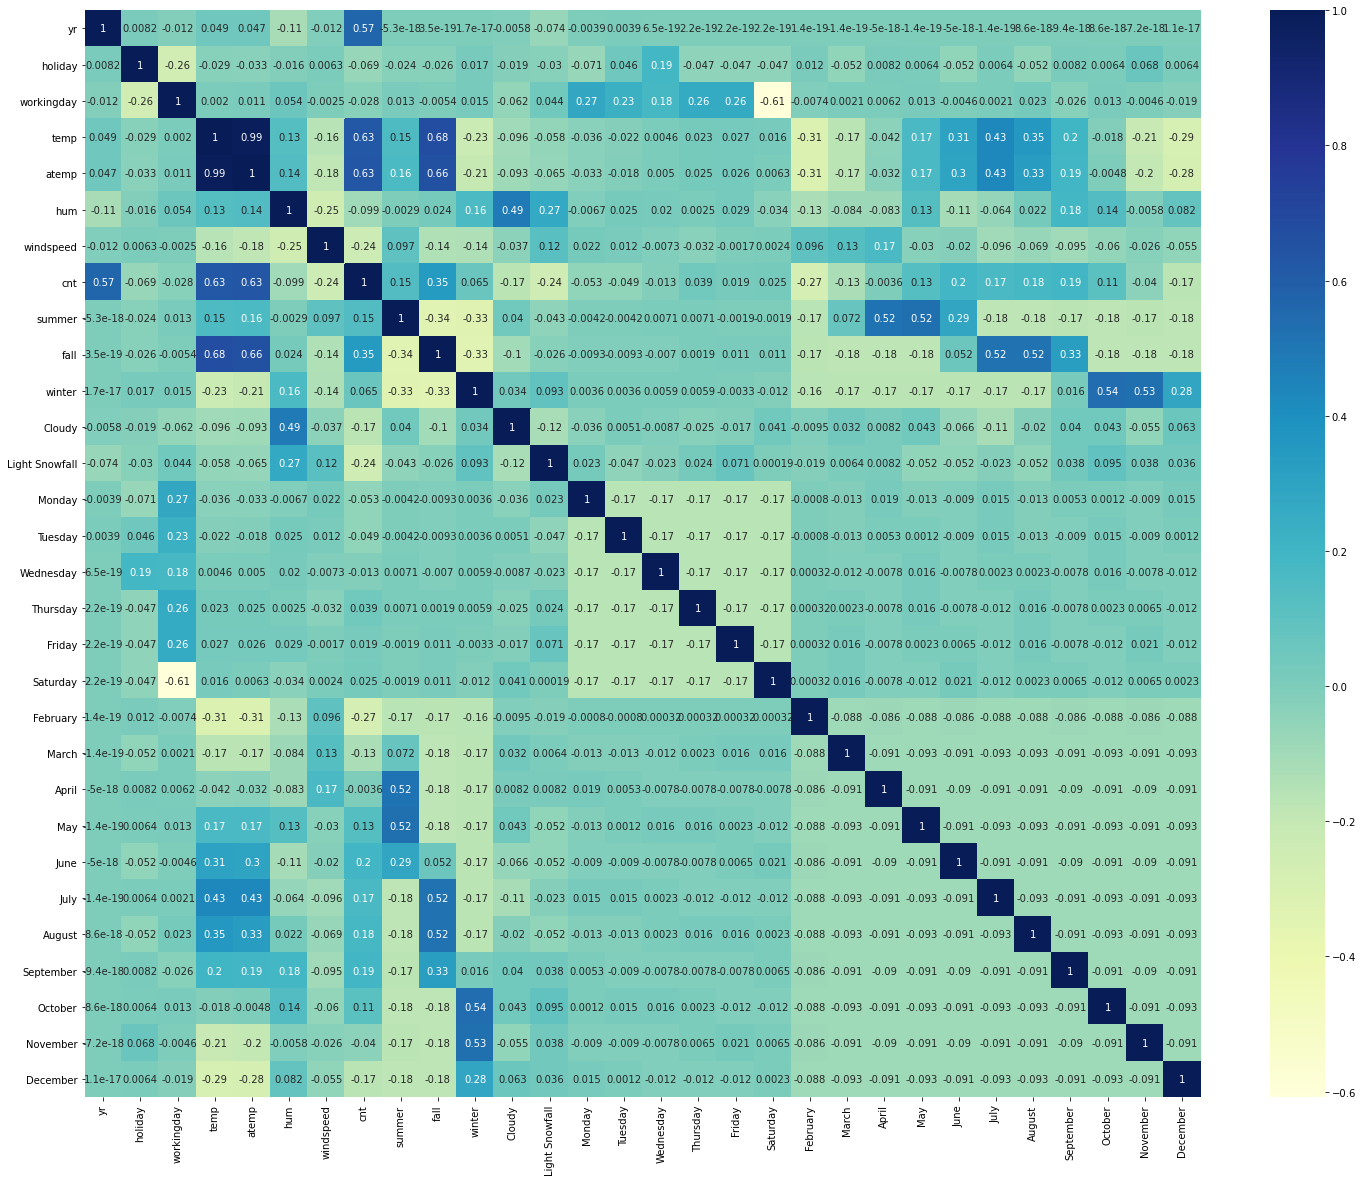

In [20]:
#Drawing correlation heatmap for the data
plt.figure(figsize=[25,20])
sns.heatmap(bikes.corr(),annot = True, cmap="YlGnBu")
plt.show()

Infrences:
- Cnt is positively correlated with year, temperature, atemp, windspeed,season
- Cnt is negatively correlated with Light snowfall which definetly agrres to our theoretical understanding that the cnt(demand) will reduce with worsening of weather condition
- We can see that temp and atemp are highly correlated , hence we'll get rid of one of them. I choose to get rid of atemp only because it's not the actual temperature, but just the feeling of a person.
- Fall is correlated with temperture and the month june/juy. Yet I choose not to drop it here and let RFE take care of wheter to select the feature or not.
- Winter is correlated with temperture and the month november/december. Yet I choose not to drop it here and let RFE take care of wheter to select the feature or not.


<a id="Linear"></a>
## Linear Regression Modelling

<a id="Split"></a>
### Train-Test Split.

In [21]:
#importing the model for train-test Split.
from sklearn.model_selection import train_test_split

#Splitting the data
df_train,df_test=train_test_split(bikes,train_size=0.7,test_size=0.3,random_state=100)

In [22]:
#Viewing columns of the data
bikes.columns

Index(['yr', 'holiday', 'workingday', 'temp', 'atemp', 'hum', 'windspeed',
       'cnt', 'summer', 'fall', 'winter', 'Cloudy', 'Light Snowfall', 'Monday',
       'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'February',
       'March', 'April', 'May', 'June', 'July', 'August', 'September',
       'October', 'November', 'December'],
      dtype='object')

<a id="MinMax"></a>
### Min-Max Scaling

Scaling the data

In [23]:
# Creating a list of variable "change_var" which needs to be scaled.
change_var=["temp","atemp","hum","windspeed","cnt"]

#importing the module for scaling
from sklearn.preprocessing import MinMaxScaler

In [24]:
#Scaling the dataset. Applting fit_transform on the train data
scalar=MinMaxScaler()
df_train[change_var]=scalar.fit_transform(df_train[change_var])

<ipython-input-24-a75e2bafab10>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_train[change_var]=scalar.fit_transform(df_train[change_var])
C:\Users\admin\anaconda3\lib\site-packages\pandas\core\indexing.py:966: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s


In [25]:
df_train.head()

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,summer,fall,...,March,April,May,June,July,August,September,October,November,December
653,1,0,1,0.509887,0.501133,0.575354,0.300794,0.864243,0,0,...,0,0,0,0,0,0,0,1,0,0
576,1,0,1,0.815169,0.766351,0.725633,0.264686,0.827658,0,1,...,0,0,0,0,1,0,0,0,0,0
426,1,0,0,0.442393,0.438975,0.640189,0.255342,0.465255,0,0,...,1,0,0,0,0,0,0,0,0,0
728,1,0,1,0.245101,0.200348,0.498067,0.663106,0.204096,0,0,...,0,0,0,0,0,0,0,0,0,1
482,1,0,0,0.395666,0.391735,0.504508,0.188475,0.482973,1,0,...,0,1,0,0,0,0,0,0,0,0


In [26]:
#Checking the min and max values of the columns to confirm if all the values of all columns lie in 0 and 1
df_train.describe()

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,summer,fall,...,March,April,May,June,July,August,September,October,November,December
count,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,...,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000
mean,0.507843,0.025490,0.711765,0.537262,0.512989,0.650369,0.320768,0.513620,0.245098,0.262745,...,0.098039,0.078431,0.084314,0.074510,0.076471,0.096078,0.080392,0.086275,0.086275,0.084314
std,0.500429,0.157763,0.453386,0.225844,0.212385,0.145882,0.169797,0.224593,0.430568,0.440557,...,0.297660,0.269113,0.278131,0.262857,0.266010,0.294988,0.272166,0.281045,0.281045,0.278131
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.339853,0.332086,0.538643,0.199179,0.356420,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,0.000000,1.000000,0.540519,0.526811,0.653714,0.296763,0.518638,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,0.000000,1.000000,0.735215,0.688457,0.754830,0.414447,0.684710,0.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


<a id="LM1"></a>
### Linear Model-I 
Trying a linear  on train data using forward method.
- I choose to work on temperature and working day as theoretically they seem to be having more correlation with the target variable

In [27]:
# Splitting the training data into independent variables and dependent variables 
y_train=df_train.pop("cnt")
X_train=df_train[['temp','workingday']]

In [28]:
#Adding a constant
X_train_sm=sm.add_constant(X_train)

#Modelling on the train data
lr=sm.OLS(y_train,X_train_sm)
lr_model=lr.fit()

In [29]:
#viewing the summary of the model.
lr_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.414
Model:                            OLS   Adj. R-squared:                  0.412
Method:                 Least Squares   F-statistic:                     179.2
Date:                Mon, 26 Oct 2020   Prob (F-statistic):           1.37e-59
Time:                        20:58:23   Log-Likelihood:                 174.85
No. Observations:                 510   AIC:                            -343.7
Df Residuals:                     507   BIC:                            -331.0
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.1712      0.023      7.399      0.000       0.126       0.217
temp           0.6399      0.034     18.929      0.000       0.574       0.706
workingday    -0.0019      0.017     -0.112      0.911      -0.035       0.031
==============================================================================
Omnibus:                        6.415   Durbin-Watson:                   2.046
Prob(Omnibus):                  0.040   Jarque-Bera (JB):                4.608
Skew:                           0.096   Prob(JB):                       0.0998
Kurtosis:                       2.576   Cond. No.                         7.02
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

- The R square and adjusted R sqaure is low. Hence we should introduce more variables into the model for improving it.
- Also the P-value of the working day is high.

<a id="LM2"></a>
### Linear Model-II
In this model we'll select 15 feature using RFE and then see the results and work accordingly.

In [30]:
#Creating New X_train
X_train=df_train

In [31]:
#Importing RFE library
from sklearn.feature_selection import RFE 
from sklearn.linear_model import LinearRegression

In [32]:
lm=LinearRegression()
lm.fit(X_train,y_train)

#Using RFE for selection
rfe=RFE(lm,15)
rfe=rfe.fit(X_train,y_train)

C:\Users\admin\anaconda3\lib\site-packages\sklearn\utils\validation.py:68: FutureWarning: Pass n_features_to_select=15 as keyword args. From version 0.25 passing these as positional arguments will result in an error
  warnings.warn("Pass {} as keyword args. From version 0.25 "


In [33]:
#Getting the rankings of the columns
list(zip(X_train.columns,rfe.support_,rfe.ranking_))

[('yr', True, 1),
 ('holiday', True, 1),
 ('workingday', False, 5),
 ('temp', True, 1),
 ('atemp', False, 4),
 ('hum', True, 1),
 ('windspeed', True, 1),
 ('summer', True, 1),
 ('fall', True, 1),
 ('winter', True, 1),
 ('Cloudy', True, 1),
 ('Light Snowfall', True, 1),
 ('Monday', False, 9),
 ('Tuesday', False, 10),
 ('Wednesday', False, 8),
 ('Thursday', False, 6),
 ('Friday', False, 7),
 ('Saturday', False, 15),
 ('February', False, 11),
 ('March', True, 1),
 ('April', False, 2),
 ('May', True, 1),
 ('June', False, 3),
 ('July', False, 12),
 ('August', True, 1),
 ('September', True, 1),
 ('October', True, 1),
 ('November', False, 13),
 ('December', False, 14)]

In [34]:
# Getting the column names which are the most import features according to RFE
col= X_train.columns[rfe.support_]
col

Index(['yr', 'holiday', 'temp', 'hum', 'windspeed', 'summer', 'fall', 'winter',
       'Cloudy', 'Light Snowfall', 'March', 'May', 'August', 'September',
       'October'],
      dtype='object')

In [35]:
# Creating the training data for modelling
X_train_rfe=X_train[col]
X_train_rfe.head()

,yr,holiday,temp,hum,windspeed,summer,fall,winter,Cloudy,Light Snowfall,March,May,August,September,October
653,1,0,0.509887,0.575354,0.300794,0,0,1,0,0,0,0,0,0,1
576,1,0,0.815169,0.725633,0.264686,0,1,0,0,0,0,0,0,0,0
426,1,0,0.442393,0.640189,0.255342,0,0,0,1,0,1,0,0,0,0
728,1,0,0.245101,0.498067,0.663106,0,0,0,0,0,0,0,0,0,0
482,1,0,0.395666,0.504508,0.188475,1,0,0,1,0,0,0,0,0,0


In [36]:
#Adding a constant column to the dataset
X_train_sm=sm.add_constant(X_train_rfe)

#Fitting the model on the data
lr=sm.OLS(y_train,X_train_sm)
lr_model=lr.fit()

#Getting the summmary of the model
lr_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.846
Model:                            OLS   Adj. R-squared:                  0.841
Method:                 Least Squares   F-statistic:                     180.3
Date:                Mon, 26 Oct 2020   Prob (F-statistic):          2.95e-189
Time:                        20:58:26   Log-Likelihood:                 514.85
No. Observations:                 510   AIC:                            -997.7
Df Residuals:                     494   BIC:                            -929.9
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const              0.2376      0.027      8.689      0.000       0.184       0.291
yr                 0.2304      0.008     28.506      0.000       0.215       0.246
holiday           -0.0891      0.025     -3.499      0.001      -0.139      -0.039
temp               0.4847      0.034     14.073      0.000       0.417       0.552
hum               -0.1784      0.038     -4.708      0.000      -0.253      -0.104
windspeed         -0.1836      0.026     -7.164      0.000      -0.234      -0.133
summer             0.1152      0.015      7.440      0.000       0.085       0.146
fall               0.0436      0.023      1.898      0.058      -0.002       0.089
winter             0.1534      0.014     10.852      0.000       0.126       0.181
Cloudy            -0.0558      0.010     -5.340      0.000      -0.076      -0.035
Light Snowfall    -0.2445      0.026     -9.265      0.000      -0.296      -0.193
March              0.0333      0.015      2.269      0.024       0.004       0.062
May                0.0307      0.018      1.717      0.087      -0.004       0.066
August             0.0511      0.017      2.931      0.004       0.017       0.085
September          0.1209      0.017      7.009      0.000       0.087       0.155
October            0.0437      0.017      2.504      0.013       0.009       0.078
==============================================================================
Omnibus:                       74.688   Durbin-Watson:                   2.026
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              186.962
Skew:                          -0.747   Prob(JB):                     2.52e-41
Kurtosis:                       5.562   Cond. No.                         19.3
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [37]:
# Importing module to calculate VIF
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [38]:
#Creating a VIF data frame to see the VIF of the columns n the dataframe
VIF=pd.DataFrame()
X_train_new = X_train_sm.drop(['const'], axis=1)

X=X_train_new
VIF['Features']=X.columns
VIF['VIF']=[variance_inflation_factor(X.values,i) for i in range(X.shape[1])]
VIF['VIF'] = round(VIF['VIF'], 2)
VIF = VIF.sort_values(by = "VIF", ascending = False)
VIF

,Features,VIF
2,temp,24.64
3,hum,15.55
6,fall,8.80
4,windspeed,3.80
5,summer,3.73
7,winter,3.13
8,Cloudy,2.15
0,yr,2.04
12,August,1.85
11,May,1.68


R squared value of the new model is 84% which is greater than the previous model.

- We see that VIF of temp is too high, but its p value is 0. Hence for now we won't drop it. 
- We can see that humidity also has a high VIF but 0 p-value. but for now we won't drop it.
- VIF and p value of fall is above permissible limit hence we decide to go ahead with drop that column.

<a id="LM3"></a>
### Linear Model-III 
In this model we consider the columns used in Model-II but we'll drop fall column 

In [39]:
#Dropping fall column
X_train_rfe=X_train_rfe.drop("fall",axis=1)

In [40]:
#Adding a constant column to the dataset
X_train_sm=sm.add_constant(X_train_rfe)

#Fitting the model on the data
lr=sm.OLS(y_train,X_train_sm)
lr_model=lr.fit()

#Getting the summmary of the model
lr_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.844
Model:                            OLS   Adj. R-squared:                  0.840
Method:                 Least Squares   F-statistic:                     191.9
Date:                Mon, 26 Oct 2020   Prob (F-statistic):          1.25e-189
Time:                        20:58:27   Log-Likelihood:                 513.00
No. Observations:                 510   AIC:                            -996.0
Df Residuals:                     495   BIC:                            -932.5
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const              0.2369      0.027      8.643      0.000       0.183       0.291
yr                 0.2290      0.008     28.377      0.000       0.213       0.245
holiday           -0.0913      0.025     -3.580      0.000      -0.141      -0.041
temp               0.5342      0.023     23.719      0.000       0.490       0.578
hum               -0.1869      0.038     -4.956      0.000      -0.261      -0.113
windspeed         -0.1881      0.026     -7.354      0.000      -0.238      -0.138
summer             0.0971      0.012      7.950      0.000       0.073       0.121
winter             0.1401      0.012     11.384      0.000       0.116       0.164
Cloudy            -0.0545      0.010     -5.210      0.000      -0.075      -0.034
Light Snowfall    -0.2393      0.026     -9.092      0.000      -0.291      -0.188
March              0.0270      0.014      1.880      0.061      -0.001       0.055
May                0.0247      0.018      1.401      0.162      -0.010       0.059
August             0.0628      0.016      3.832      0.000       0.031       0.095
September          0.1314      0.016      8.021      0.000       0.099       0.164
October            0.0390      0.017      2.251      0.025       0.005       0.073
==============================================================================
Omnibus:                       65.908   Durbin-Watson:                   2.027
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              151.845
Skew:                          -0.690   Prob(JB):                     1.06e-33
Kurtosis:                       5.289   Cond. No.                         18.7
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [41]:
#Creating a VIF data frame to see the VIF of the columns n the dataframe
VIF=pd.DataFrame()
X_train_new = X_train_sm.drop(['const'], axis=1)

X=X_train_new
VIF['Features']=X.columns
VIF['VIF']=[variance_inflation_factor(X.values,i) for i in range(X.shape[1])]
VIF['VIF'] = round(VIF['VIF'], 2)
VIF = VIF.sort_values(by = "VIF", ascending = False)
VIF

,Features,VIF
3,hum,14.88
2,temp,10.03
4,windspeed,3.75
6,winter,2.35
5,summer,2.31
7,Cloudy,2.14
0,yr,2.02
10,May,1.63
11,August,1.62
13,October,1.61


Rsquare of the new model is 84%, it is not much different from previous one.

We hace a case of high vif low p-value and vice-versa.
- VIF of march is low but its p-value is high. but for now we won't drop it.
- VIF of hum is high but it's p-value is low. So we are dropping it .

<a id="LM4"></a>
### Linear Model-IV
This is a revised model of MODEL-III, only difference is that we are dropping "hum" column i.e humidity column.

In [42]:
#Dropping hum column
X_train_rfe=X_train_rfe.drop("hum",axis=1)

In [43]:
#Adding a constant column to the dataset
X_train_sm=sm.add_constant(X_train_rfe)

#Fitting the model on the data
lr=sm.OLS(y_train,X_train_sm)
lr_model=lr.fit()

#Getting the summmary of the model
lr_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.837
Model:                            OLS   Adj. R-squared:                  0.832
Method:                 Least Squares   F-statistic:                     195.5
Date:                Mon, 26 Oct 2020   Prob (F-statistic):          1.33e-185
Time:                        20:58:27   Log-Likelihood:                 500.65
No. Observations:                 510   AIC:                            -973.3
Df Residuals:                     496   BIC:                            -914.0
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const              0.1293      0.017      7.552      0.000       0.096       0.163
yr                 0.2328      0.008     28.318      0.000       0.217       0.249
holiday           -0.0930      0.026     -3.565      0.000      -0.144      -0.042
temp               0.5138      0.023     22.672      0.000       0.469       0.558
windspeed         -0.1536      0.025     -6.097      0.000      -0.203      -0.104
summer             0.0979      0.012      7.835      0.000       0.073       0.122
winter             0.1312      0.012     10.529      0.000       0.107       0.156
Cloudy            -0.0838      0.009     -9.490      0.000      -0.101      -0.066
Light Snowfall    -0.2895      0.025    -11.647      0.000      -0.338      -0.241
March              0.0268      0.015      1.825      0.069      -0.002       0.056
May                0.0116      0.018      0.650      0.516      -0.023       0.047
August             0.0602      0.017      3.595      0.000       0.027       0.093
September          0.1236      0.017      7.406      0.000       0.091       0.156
October            0.0341      0.018      1.929      0.054      -0.001       0.069
==============================================================================
Omnibus:                       63.138   Durbin-Watson:                   2.037
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              141.499
Skew:                          -0.672   Prob(JB):                     1.88e-31
Kurtosis:                       5.203   Cond. No.                         10.7
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [44]:
#Creating a VIF data frame to see the VIF of the columns n the dataframe
VIF=pd.DataFrame()
X_train_new = X_train_sm.drop(['const'], axis=1)

X=X_train_new
VIF['Features']=X.columns
VIF['VIF']=[variance_inflation_factor(X.values,i) for i in range(X.shape[1])]
VIF['VIF'] = round(VIF['VIF'], 2)
VIF = VIF.sort_values(by = "VIF", ascending = False)
VIF

,Features,VIF
2,temp,5.22
3,windspeed,3.32
4,summer,2.31
0,yr,2.01
5,winter,1.98
9,May,1.62
10,August,1.62
12,October,1.60
6,Cloudy,1.50
11,September,1.35


The R squared value and adjusted R-squared Value is around 83% which is only 1% different from Model-III. So we can go ahead with Model-IV.

`Other Observations:`
- We can observe that VIF of temp has gone down to 5.22 which is just above permissible limit, hence for now I'll keep it.
- P-value of May is extremely high, so let's go ahead in dropping them.
- One of the major reason why I chose temp over May is because the correlation coefficient of temp is the most.

<a id="LM5"></a>
### Linear Model-V
This model will be a revised model of MODEL-IV, after dropping May column.

In [45]:
#Dropping May column
X_train_rfe=X_train_rfe.drop("May",axis=1)

In [46]:
#Adding a constant column to the dataset
X_train_sm=sm.add_constant(X_train_rfe)

#Fitting the model on the data
lr=sm.OLS(y_train,X_train_sm)
lr_model=lr.fit()

#Getting the summmary of the model
lr_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.837
Model:                            OLS   Adj. R-squared:                  0.833
Method:                 Least Squares   F-statistic:                     212.0
Date:                Mon, 26 Oct 2020   Prob (F-statistic):          1.10e-186
Time:                        20:58:27   Log-Likelihood:                 500.43
No. Observations:                 510   AIC:                            -974.9
Df Residuals:                     497   BIC:                            -919.8
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const              0.1293      0.017      7.558      0.000       0.096       0.163
yr                 0.2325      0.008     28.336      0.000       0.216       0.249
holiday           -0.0933      0.026     -3.580      0.000      -0.145      -0.042
temp               0.5153      0.023     22.861      0.000       0.471       0.560
windspeed         -0.1549      0.025     -6.169      0.000      -0.204      -0.106
summer             0.1016      0.011      9.162      0.000       0.080       0.123
winter             0.1310      0.012     10.522      0.000       0.107       0.155
Cloudy            -0.0833      0.009     -9.474      0.000      -0.101      -0.066
Light Snowfall    -0.2897      0.025    -11.661      0.000      -0.339      -0.241
March              0.0253      0.014      1.745      0.082      -0.003       0.054
August             0.0594      0.017      3.556      0.000       0.027       0.092
September          0.1229      0.017      7.383      0.000       0.090       0.156
October            0.0339      0.018      1.918      0.056      -0.001       0.069
==============================================================================
Omnibus:                       62.599   Durbin-Watson:                   2.039
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              137.839
Skew:                          -0.673   Prob(JB):                     1.17e-30
Kurtosis:                       5.162   Cond. No.                         10.7
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [47]:
#Creating a VIF data frame to see the VIF of the columns n the dataframe
VIF=pd.DataFrame()
X_train_new = X_train_sm.drop(['const'], axis=1)

X=X_train_new
VIF['Features']=X.columns
VIF['VIF']=[variance_inflation_factor(X.values,i) for i in range(X.shape[1])]
VIF['VIF'] = round(VIF['VIF'], 2)
VIF = VIF.sort_values(by = "VIF", ascending = False)
VIF

,Features,VIF
2,temp,5.11
3,windspeed,3.30
0,yr,2.01
5,winter,1.98
4,summer,1.82
9,August,1.61
11,October,1.60
6,Cloudy,1.49
10,September,1.34
8,March,1.19


R Squared value and adjusted R squard value is still 83% after dropping May column, hence we can go ahead with MODEL-V.

`Other Observations:`
- VIF of temperature has reduced but the p-value of March has increased hence we delete march and see the new results

<a id="LM6"></a>
### Linear Model-VI
This is a revised model of MODEL-V. In this model we will do modelling after dropping March column

In [48]:
#Dropping March column
X_train_rfe=X_train_rfe.drop("March",axis=1)

In [49]:
#Adding a constant column to the dataset
X_train_sm=sm.add_constant(X_train_rfe)

#Fitting the model on the data
lr=sm.OLS(y_train,X_train_sm)
lr_model=lr.fit()

#Getting the summmary of the model
lr_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.836
Model:                            OLS   Adj. R-squared:                  0.832
Method:                 Least Squares   F-statistic:                     230.1
Date:                Mon, 26 Oct 2020   Prob (F-statistic):          3.21e-187
Time:                        20:58:28   Log-Likelihood:                 498.87
No. Observations:                 510   AIC:                            -973.7
Df Residuals:                     498   BIC:                            -922.9
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const              0.1355      0.017      8.079      0.000       0.103       0.168
yr                 0.2328      0.008     28.309      0.000       0.217       0.249
holiday           -0.0959      0.026     -3.679      0.000      -0.147      -0.045
temp               0.5091      0.022     22.823      0.000       0.465       0.553
windspeed         -0.1519      0.025     -6.053      0.000      -0.201      -0.103
summer             0.1015      0.011      9.136      0.000       0.080       0.123
winter             0.1266      0.012     10.362      0.000       0.103       0.151
Cloudy            -0.0834      0.009     -9.463      0.000      -0.101      -0.066
Light Snowfall    -0.2883      0.025    -11.587      0.000      -0.337      -0.239
August             0.0572      0.017      3.431      0.001       0.024       0.090
September          0.1211      0.017      7.278      0.000       0.088       0.154
October            0.0342      0.018      1.931      0.054      -0.001       0.069
==============================================================================
Omnibus:                       62.884   Durbin-Watson:                   2.039
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              145.666
Skew:                          -0.659   Prob(JB):                     2.34e-32
Kurtosis:                       5.263   Cond. No.                         10.6
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [50]:
#Creating a VIF data frame to see the VIF of the columns n the dataframe
VIF=pd.DataFrame()
X_train_new = X_train_sm.drop(['const'], axis=1)

X=X_train_new
VIF['Features']=X.columns
VIF['VIF']=[variance_inflation_factor(X.values,i) for i in range(X.shape[1])]
VIF['VIF'] = round(VIF['VIF'], 2)
VIF = VIF.sort_values(by = "VIF", ascending = False)
VIF

,Features,VIF
2,temp,5.11
3,windspeed,3.11
0,yr,2.00
5,winter,1.95
4,summer,1.82
10,October,1.60
8,August,1.59
6,Cloudy,1.49
9,September,1.34
7,Light Snowfall,1.09


Yet again R-squared and adjusted R-squared value has remaind 83%, hence we go ahead with MODEL-VI.

`Other Observations:`
- We still have October's p-value above permissible limit, so lets go ahead in dropping it.

<a id="LM7"></a>
### Linear Model-VII
This is a revised model of MODEL-VI, we will be modelling after dropping October column

In [51]:
#Dropping October column
X_train_rfe=X_train_rfe.drop("October",axis=1)

In [52]:
#Adding a constant column to the dataset
X_train_sm=sm.add_constant(X_train_rfe)

#Fitting the model on the data
lr=sm.OLS(y_train,X_train_sm)
lr_model=lr.fit()

#Getting the summmary of the model
lr_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.834
Model:                            OLS   Adj. R-squared:                  0.831
Method:                 Least Squares   F-statistic:                     251.3
Date:                Mon, 26 Oct 2020   Prob (F-statistic):          1.26e-187
Time:                        20:58:28   Log-Likelihood:                 496.97
No. Observations:                 510   AIC:                            -971.9
Df Residuals:                     499   BIC:                            -925.4
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const              0.1312      0.017      7.871      0.000       0.098       0.164
yr                 0.2325      0.008     28.202      0.000       0.216       0.249
holiday           -0.0971      0.026     -3.715      0.000      -0.148      -0.046
temp               0.5174      0.022     23.564      0.000       0.474       0.560
windspeed         -0.1497      0.025     -5.956      0.000      -0.199      -0.100
summer             0.1000      0.011      8.995      0.000       0.078       0.122
winter             0.1383      0.011     13.003      0.000       0.117       0.159
Cloudy            -0.0825      0.009     -9.354      0.000      -0.100      -0.065
Light Snowfall    -0.2828      0.025    -11.411      0.000      -0.332      -0.234
August             0.0542      0.017      3.253      0.001       0.021       0.087
September          0.1162      0.016      7.045      0.000       0.084       0.149
==============================================================================
Omnibus:                       55.419   Durbin-Watson:                   2.051
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              120.468
Skew:                          -0.605   Prob(JB):                     6.93e-27
Kurtosis:                       5.050   Cond. No.                         10.4
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [53]:
#Creating a VIF data frame to see the VIF of the columns n the dataframe
VIF=pd.DataFrame()
X_train_new = X_train_sm.drop(['const'], axis=1)

X=X_train_new
VIF['Features']=X.columns
VIF['VIF']=[variance_inflation_factor(X.values,i) for i in range(X.shape[1])]
VIF['VIF'] = round(VIF['VIF'], 2)
VIF = VIF.sort_values(by = "VIF", ascending = False)
VIF

,Features,VIF
2,temp,5.01
3,windspeed,3.10
0,yr,2.00
4,summer,1.81
8,August,1.58
5,winter,1.49
6,Cloudy,1.48
9,September,1.31
7,Light Snowfall,1.08
1,holiday,1.04


`Observations:`
- The above model has no column with extremely high VIF or high p-value. Hence the above model seems to be the best.
- The R-squared value and adjusted R-squared value is 83% which is pretty good.

<a id="Residual"></a>
### Residual Analysis
This is performed on the training data set to confirm the normal distribution of error terms.

In [54]:
# Getting predicted values of the model
y_train_pred=lr_model.predict(X_train_sm)

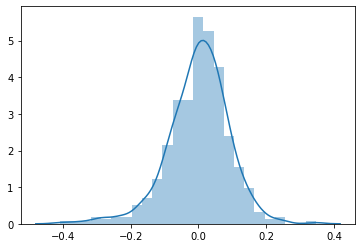

In [55]:
#Finding the residuals
res=y_train-y_train_pred

#Plotting the residuals
sns.distplot(res,bins=25)
plt.show()

The distribution of the residual is almost normal distribution, hence the model seems to follow the assumption of Multiple linear Regression.

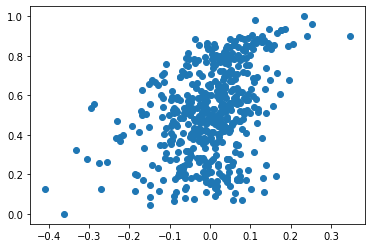

In [56]:
#Plotting scatter graph of residual vs predicted
plt.scatter(res,y_train)
plt.show()

The complete randomness of the graph confirms the presence of homoscedasticity in the residual terms

<a id="Predict"></a>
### Prediction on Test Dataset

In [57]:
#Scaling the test dataset

df_test[change_var]=scalar.transform(df_test[change_var])

<ipython-input-57-67a399e300ba>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_test[change_var]=scalar.transform(df_test[change_var])
C:\Users\admin\anaconda3\lib\site-packages\pandas\core\indexing.py:966: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s


In [58]:
#Viewing the test dataset after rescaling.
df_test.head()

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,summer,fall,...,March,April,May,June,July,August,September,October,November,December
184,0,1,0,0.831783,0.769660,0.657364,0.084219,0.692706,0,1,...,0,0,0,0,1,0,0,0,0,0
535,1,0,1,0.901354,0.842587,0.610133,0.153728,0.712034,1,0,...,0,0,0,1,0,0,0,0,0,0
299,0,0,0,0.511964,0.496145,0.837699,0.334206,0.303382,0,0,...,0,0,0,0,0,0,0,1,0,0
221,0,0,1,0.881625,0.795343,0.437098,0.339570,0.547400,0,1,...,0,0,0,0,0,1,0,0,0,0
152,0,0,0,0.817246,0.741471,0.314298,0.537414,0.569029,1,0,...,0,0,0,1,0,0,0,0,0,0


In [59]:
df_test.describe()

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,summer,fall,...,March,April,May,June,July,August,September,October,November,December
count,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,...,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000
mean,0.479452,0.036530,0.639269,0.558941,0.532991,0.638508,0.313350,0.520592,0.264840,0.246575,...,0.054795,0.091324,0.086758,0.095890,0.105023,0.059361,0.086758,0.082192,0.073059,0.086758
std,0.500722,0.188034,0.481313,0.233698,0.217888,0.148974,0.159947,0.218435,0.442259,0.432005,...,0.228100,0.288730,0.282125,0.295115,0.307285,0.236840,0.282125,0.275286,0.260830,0.282125
min,0.000000,0.000000,0.000000,0.046591,0.025950,0.261915,-0.042808,0.048205,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.354650,0.344751,0.527265,0.198517,0.377531,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,1.000000,0.558691,0.549198,0.627737,0.299459,0.524275,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,0.000000,1.000000,0.759096,0.714132,0.743928,0.403048,0.672745,1.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,1.000000,0.984424,0.980934,1.002146,0.807474,0.963300,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [60]:
#Creating y_test and X_test 
y_test=df_test.pop("cnt")
X_test=df_test

In [61]:
#Creating X_test by selecting only important features which were used for training
X_test_new = X_test[X_train_new.columns]
X_test_new.head()

,yr,holiday,temp,windspeed,summer,winter,Cloudy,Light Snowfall,August,September
184,0,1,0.831783,0.084219,0,0,1,0,0,0
535,1,0,0.901354,0.153728,1,0,0,0,0,0
299,0,0,0.511964,0.334206,0,1,1,0,0,0
221,0,0,0.881625,0.339570,0,0,0,0,1,0
152,0,0,0.817246,0.537414,1,0,0,0,0,0


In [62]:
#Adding a constant column to the dataframe,which will be used in the model
X_test_new=sm.add_constant(X_test_new)

#Making predictions for test data
y_test_pred=lr_model.predict(X_test_new)

<a id="Eval"></a>
### Model Evaluation

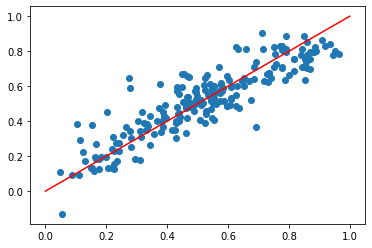

In [63]:
#Plotting a scatter plot of test vs prediction
x = [0,1]
y = x
plt.plot(x, y, '-r')
plt.scatter(y_test,y_test_pred)
plt.show()

In [64]:
#imorting library for evaluting use R2 sqaue and RMSE
from sklearn import metrics

In [65]:
print("r2_square for train:",metrics.r2_score(y_train,y_train_pred))
print("r2_square for test:",metrics.r2_score(y_test,y_test_pred))

r2_square for train: 0.8343511499404234
r2_square for test: 0.7931434526028904


The R-squared value for test data is 79% and for train data is 83% which is acceptable.

Hence, the best fit line for the data is:

$ cnt =  0.232\times yr   -0.097  \times  holiday + 0.517 \times temp - 0.150 \times windspeed + 0.099 \times summer + 0.138 \times Cloudy - 0.283 \times Light Snowfall + 0.054 \times August + 0.116 \times September + 0.131  $

The above model can be explained as:
-  A unit change in yr can bring 0.232 change in cnt(i.e. demand)
-  A unit change in temp can have 0.517 change in cnt(i.e. demand)
-  A unit change in windspeed cab have a -0.150 change in cnt(i.e. demand)

Similar inferences can be drawn from other variables.

The model accuracy could be improved by some other techniques.